# Chapter 5: Exploring Assumptions

In [192]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, kurtosis
import matplotlib.pyplot as plt
from scipy import stats
import math

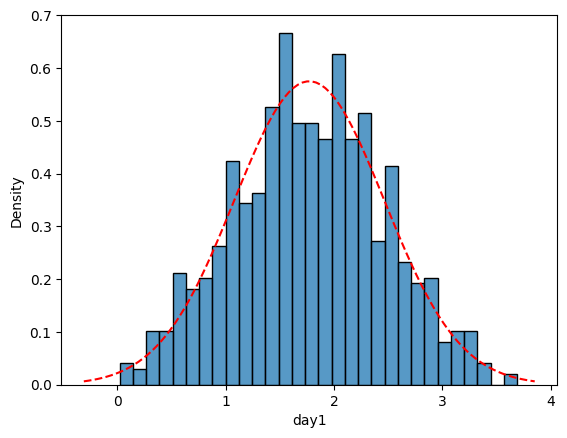

In [60]:
festivalData = pd.read_csv("DownloadFestival.csv")
festivalData = festivalData[festivalData['day1'] <= 4]
sns.histplot(data=festivalData, x="day1", stat="density", bins=30)

# Calculate mean and standard deviation
mean = festivalData["day1"].mean()
std_dev = festivalData["day1"].std()

# Generate points for the Gaussian distribution curve
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
y = norm.pdf(x, mean, std_dev)

# Plot the Gaussian distribution curve
plt.plot(x, y, color="red", linestyle="--")

# Show plot
plt.show()

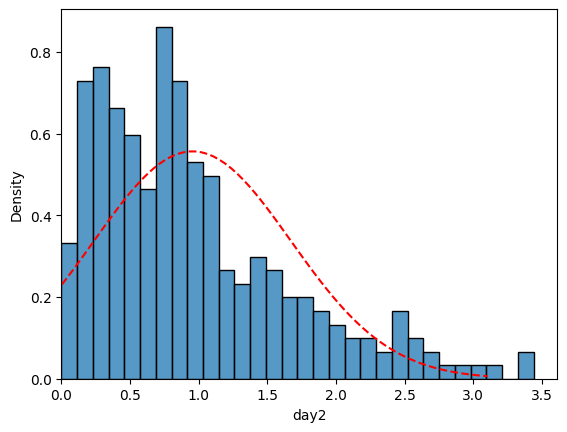

In [61]:
sns.histplot(data=festivalData, x='day2', stat='density', kde=False, bins=30)

# get mean and sd
m = festivalData['day2'].mean()
sd = festivalData['day2'].std()

# x = evenly spaced values with mean and sd
x = np.linspace(m - sd * 3, m + sd * 3, 100)
# y = probability of each value appearing in a normal distribution using pdf (probabbility density function)
y = norm.pdf(x, m, sd)
plt.xlim(0)

plt.plot(x, y, color="red", linestyle="--")

(0.0, 3.638216346667501)

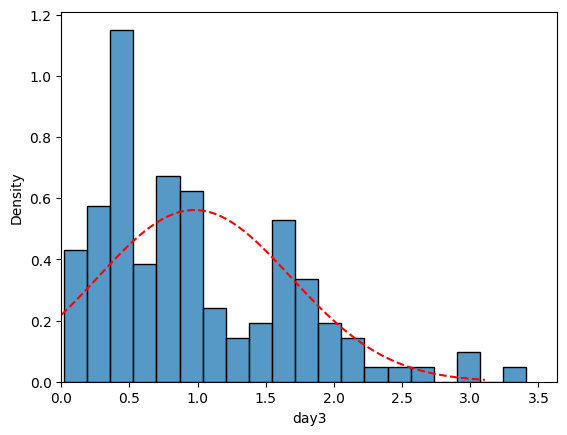

In [62]:
sns.histplot(data=festivalData, x='day3', stat='density', bins=20, kde=False)
# mean and sd
m = festivalData['day3'].mean()
sd = festivalData['day3'].std()

# x,y
x = np.linspace(m - sd * 3, m + sd * 3, 100)
y = norm.pdf(x, m, sd)

plt.plot(x, y, color="red", linestyle="--")
plt.xlim(0)

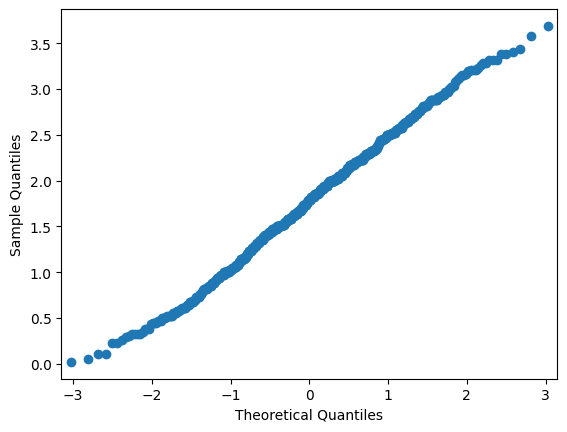

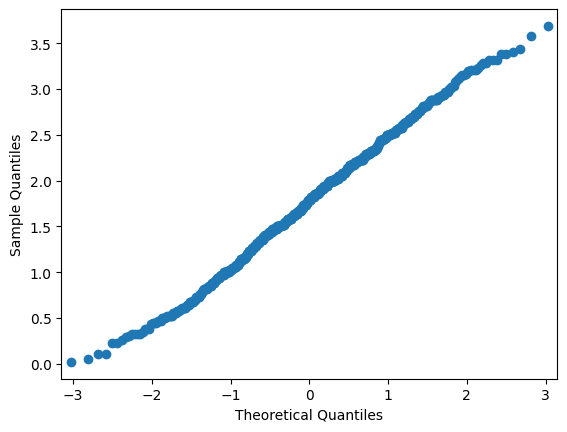

In [65]:
import statsmodels.api as sm

sm.qqplot(festivalData["day1"])

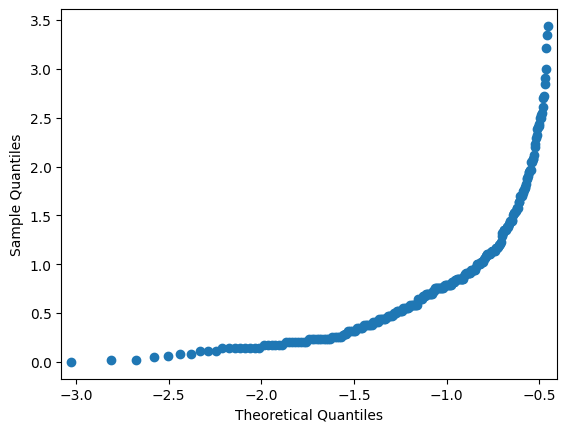

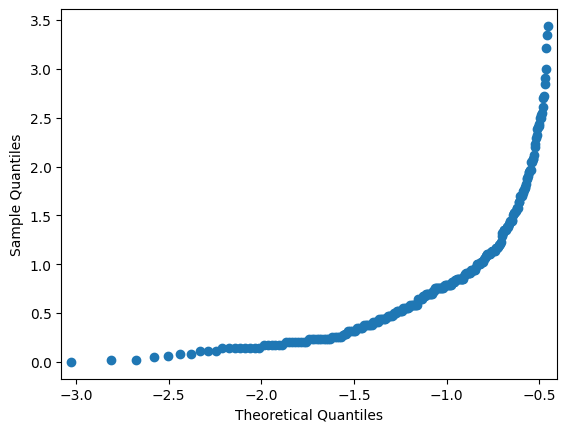

In [66]:
sm.qqplot(festivalData["day2"])

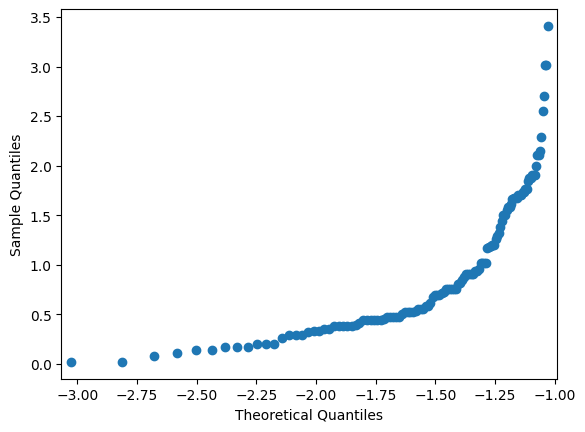

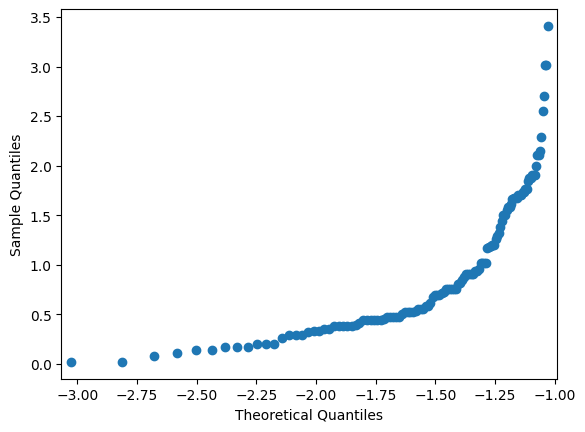

In [67]:
sm.qqplot(festivalData["day3"])

### Quantifying normality with numbers

In [82]:
festivalData[['day1', 'day2', 'day3']].describe().round(2)

,day1,day2,day3
count,809.00,263.00,123.00
mean,1.77,0.96,0.98
std,0.69,0.72,0.71
min,0.02,0.00,0.02
25%,1.31,0.41,0.44
50%,1.79,0.79,0.76
75%,2.23,1.34,1.52
max,3.69,3.44,3.41


In [85]:
print("skew:", skew(festivalData[["day1", "day2", "day3"]], nan_policy='omit').round(2))
print("kurtosis:", kurtosis(festivalData[['day1', 'day2', 'day3']], nan_policy='omit').round(2))

skew: [-0.    1.1   1.02]
kurtosis: [-0.42  0.86  0.65]


### Exploring groups of data

#### self-test
Using what you have learnt so far, obtain descriptive statistics and draw histograms of first-year exam scores, computer literacy, numeracy and lectures attended.

In [157]:
rexam = pd.read_csv("Rcomputer.csv")
rcomputer.head()
uni_names = {0: "Duncetown University", 1: "Sussex University"}
rexam["uni"] = rexam["uni"].map(uni_names)

In [158]:
rexam.describe().round(2)

,exam,computer,lectures,numeracy
count,100.00,100.00,100.00,100.00
mean,58.10,50.71,59.76,4.85
std,21.32,8.26,21.68,2.71
min,15.00,27.00,8.00,1.00
25%,38.00,45.75,46.38,3.00
50%,60.00,51.50,62.00,4.00
75%,75.00,56.00,74.62,7.00
max,99.00,73.00,100.00,14.00


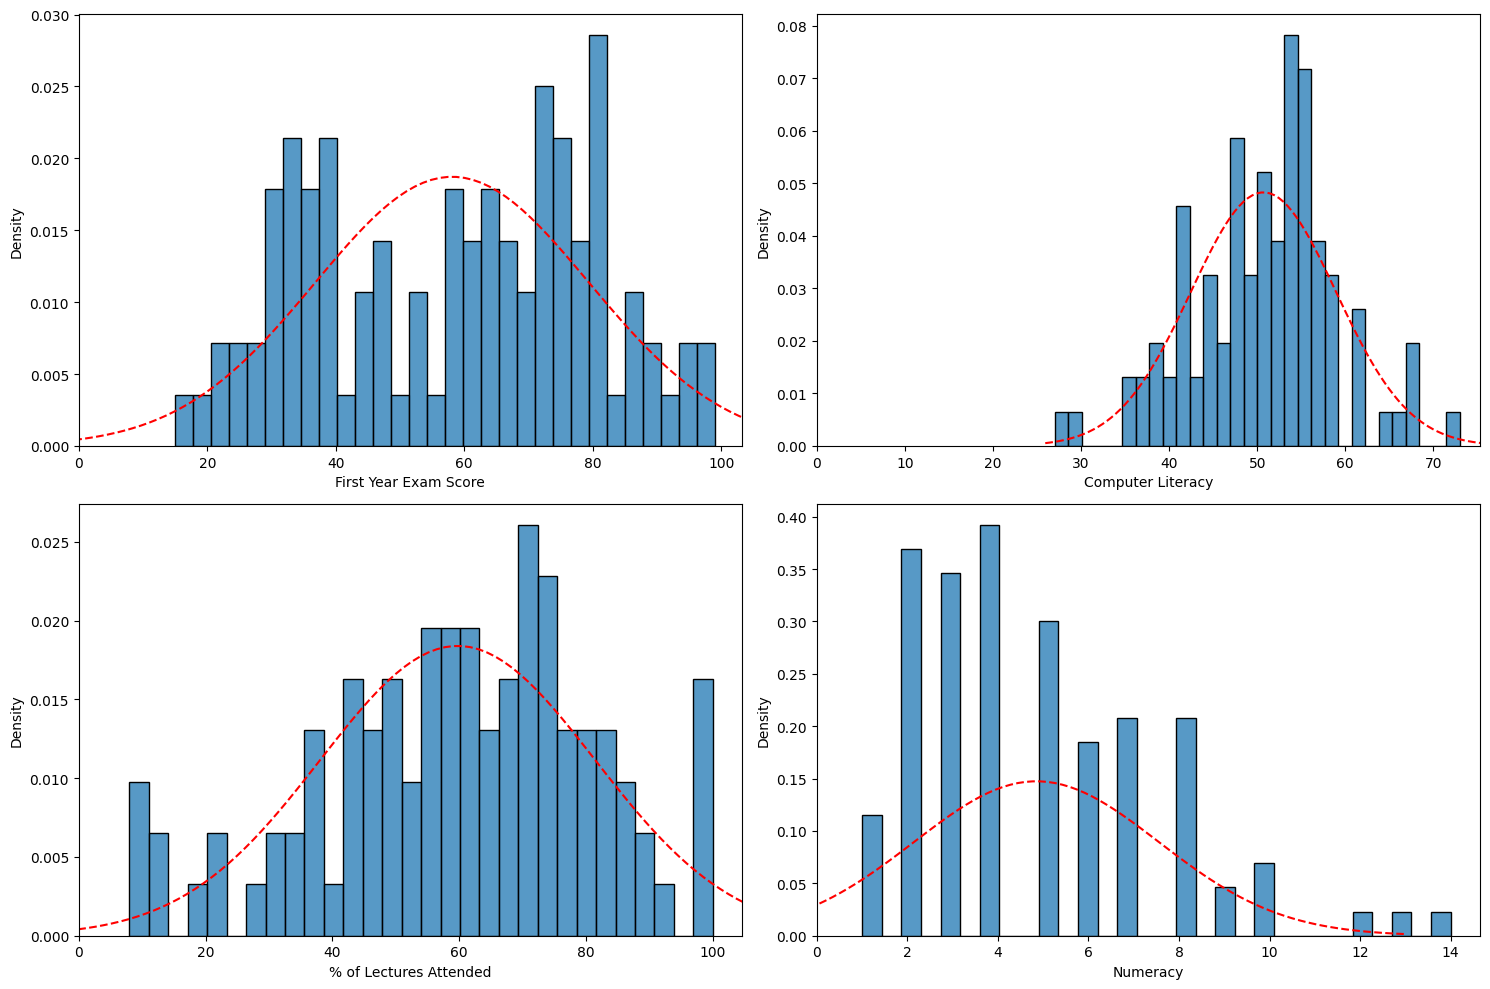

In [147]:
def norm_curve(data, ax=None):
    if ax is None:
        ax = plt.gca()  # Get current axes if not provided

    # get mean and sd
    m = data.mean()
    sd = data.std()

    # get evenly spaced x and pdf y
    x = np.linspace(m - sd * 3, m + sd * 3, 100)
    y = norm.pdf(x, m, sd)
    ax.plot(x, y, color="red", linestyle="--")


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# current_axis = 0,0
# sns.histplot(ax=axes[current_axis], x=rexam["exam"], stat="density", bins=30)
# axes[current_axis].set_xlabel("First Year Exam Score")
# axes[current_axis].set_xlim(0)
# norm_curve(rexam["exam"], axes[current_axis])

# current_axis = 0, 1
# sns.histplot(ax=axes[current_axis], x=rexam["computer"], stat="density", bins=30)
# axes[current_axis].set_xlabel("Computer Literacy")
# axes[current_axis].set_xlim(0)
# norm_curve(rexam["computer"], axes[current_axis])

# current_axis = 1, 0
# sns.histplot(ax=axes[current_axis], x=rexam["lectures"], stat="density", bins=30)
# axes[current_axis].set_xlabel("% of Lectures Attended")
# axes[current_axis].set_xlim(0)
# norm_curve(rexam["lectures"], axes[current_axis])

# current_axis = 1,1
# sns.histplot(ax=axes[current_axis], x=rexam["numeracy"], stat="density", bins=30)
# axes[current_axis].set_xlim(0)
# axes[current_axis].set_xlabel("Numeracy")
# norm_curve(rexam["numeracy"], axes[current_axis])

columns = ["exam", "computer", "lectures", "numeracy"]
labels = [
    "First Year Exam Score",
    "Computer Literacy",
    "% of Lectures Attended",
    "Numeracy",
]

# Iterate over axes and columns
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        column = columns[i * 2 + j]  # Assuming axes are arranged in a 2x2 grid
        label = labels[i * 2 + j]

        sns.histplot(ax=ax, x=rexam[column], stat="density", bins=30)
        ax.set_xlabel(label)
        ax.set_xlim(0)
        norm_curve(rexam[column], ax)

plt.tight_layout()  # Adjust layout
plt.show()

#### Running analysis for different groups


In [163]:
# descriptive statistics by uni
dunce_data = rexam[rexam["uni"] == "Duncetown University"]
sussex_data = rexam[rexam["uni"] == "Sussex University"]

print("Duncetown University")
print(dunce_data.describe().round(2))
print("Sussex University")
print(sussex_data.describe().round(2))

Duncetown University
        exam  computer  lectures  numeracy
count  50.00     50.00     50.00     50.00
mean   40.18     50.26     56.26      4.12
std    12.59      8.07     23.77      2.07
min    15.00     35.00      8.00      1.00
25%    31.25     44.25     43.75      3.00
50%    38.00     49.00     60.50      4.00
75%    47.75     55.75     70.88      5.75
max    66.00     67.00    100.00      9.00
Sussex University
        exam  computer  lectures  numeracy
count  50.00     50.00     50.00     50.00
mean   76.02     51.16     63.27      5.58
std    10.21      8.51     18.97      3.07
min    56.00     27.00     12.50      1.00
25%    69.00     47.25     49.12      3.00
50%    75.00     54.00     65.75      5.00
75%    81.00     56.00     78.00      7.75
max    99.00     73.00    100.00     14.00


Duncetown University


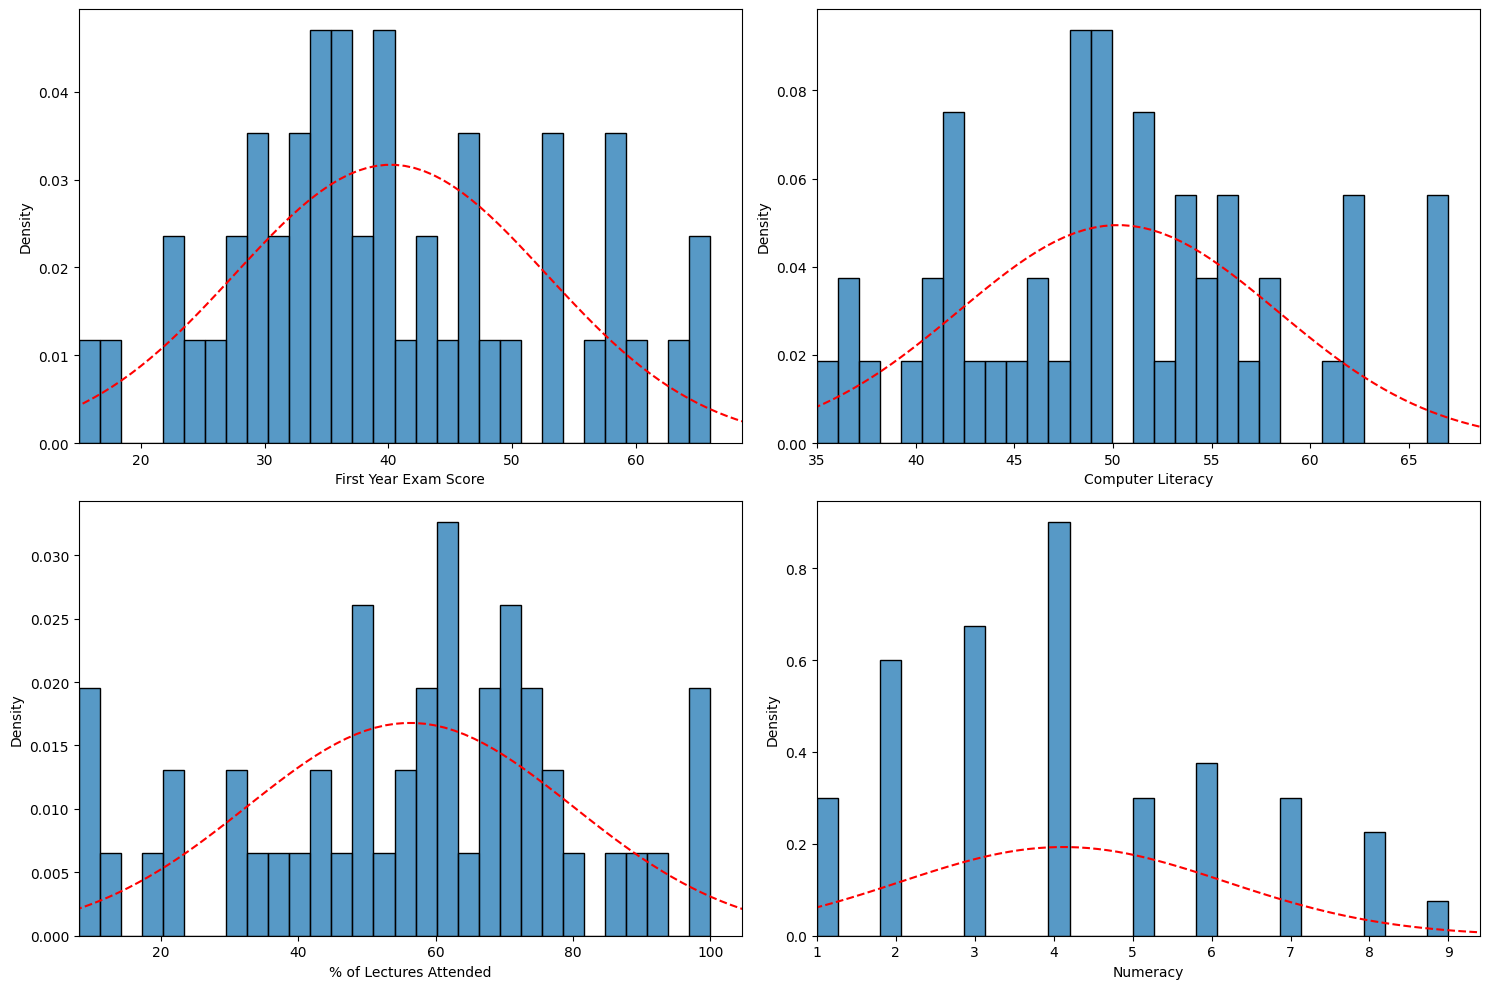

In [168]:
print("Duncetown University")
# Iterate over axes and columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        column = columns[i * 2 + j]  # Assuming axes are arranged in a 2x2 grid
        label = labels[i * 2 + j]

        sns.histplot(ax=ax, x=dunce_data[column], stat="density", bins=30)
        ax.set_xlabel(label)
        ax.set_xlim(dunce_data[column].min())
        norm_curve(dunce_data[column], ax)

plt.tight_layout()  # Adjust layout
plt.show()

Sussex University


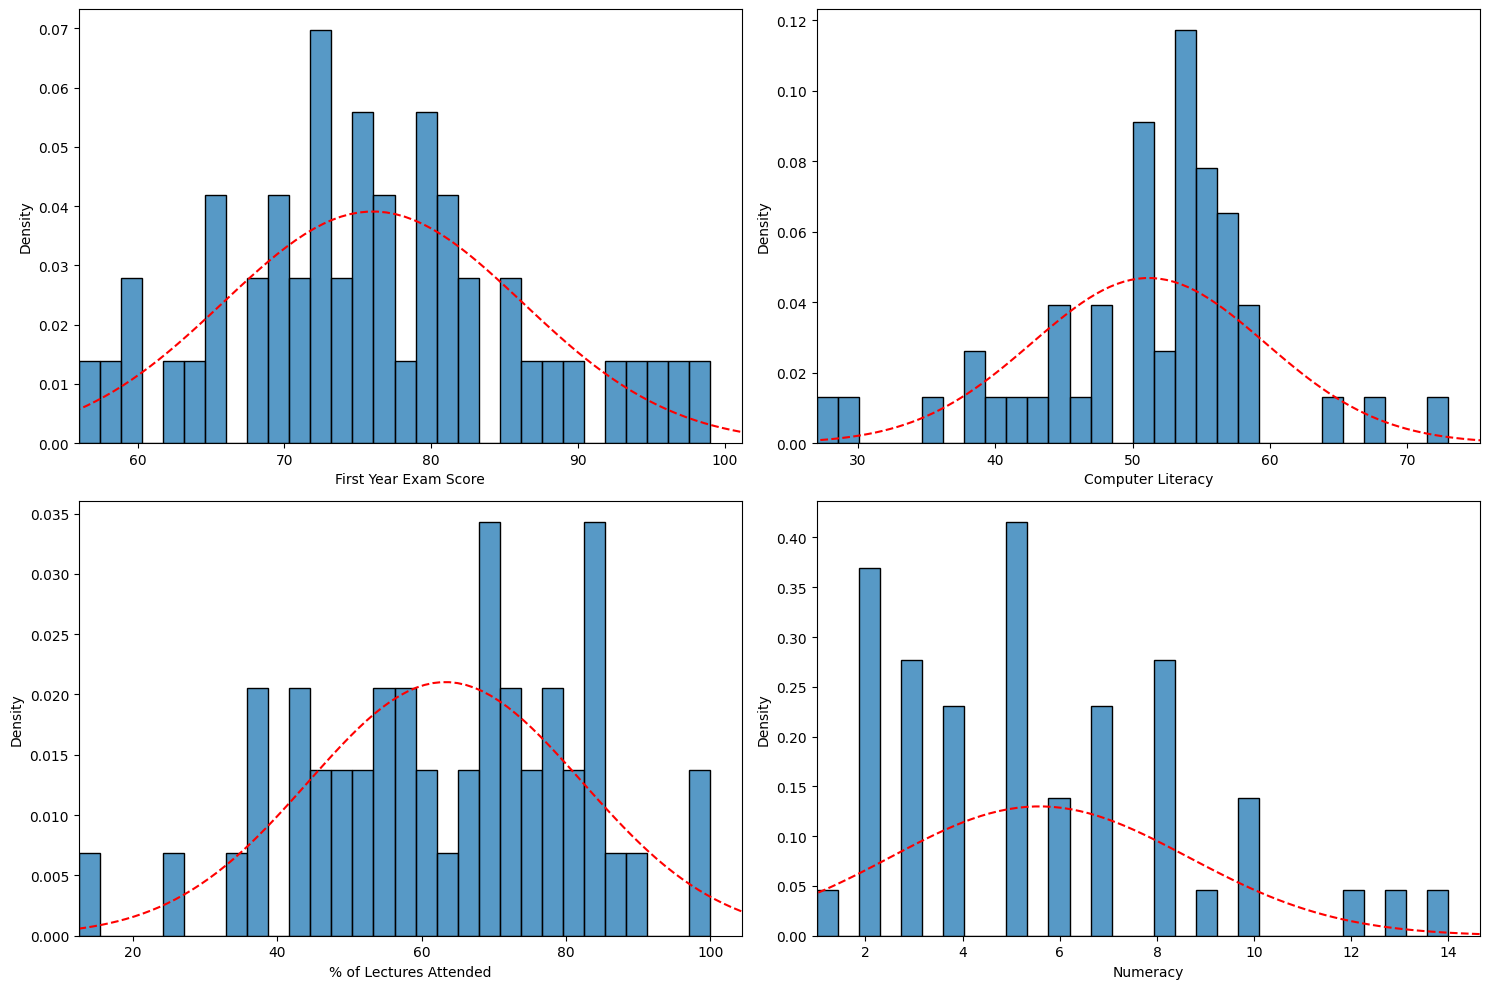

In [167]:
print("Sussex University")
# Iterate over axes and columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        column = columns[i * 2 + j]  # Assuming axes are arranged in a 2x2 grid
        label = labels[i * 2 + j]

        sns.histplot(ax=ax, x=sussex_data[column], stat="density", bins=30)
        ax.set_xlabel(label)
        ax.set_xlim(sussex_data[column].min())
        norm_curve(sussex_data[column], ax)

plt.tight_layout()  # Adjust layout
plt.show()

In [181]:
# Shapiro-Wilk test in python
s_w_exam = stats.shapiro(rexam['exam'])
s_w_computer = stats.shapiro(rexam["computer"])
s_w_lectures = stats.shapiro(rexam["lectures"])
s_w_numeracy = stats.shapiro(rexam["numeracy"])

print("shapiro-wilk Exam:", s_w_exam)
print("shapiro-wilk Computer:", s_w_computer)
print("shapiro-wilk Lectures:", s_w_lectures)
print("shapiro-wilk Numeracy:", s_w_numeracy)

shapiro-wilk Exam: ShapiroResult(statistic=0.961309485570043, pvalue=0.004991062456389283)
shapiro-wilk Computer: ShapiroResult(statistic=0.9870551999075867, pvalue=0.44134847411635064)
shapiro-wilk Lectures: ShapiroResult(statistic=0.9769791428167786, pvalue=0.07712448455127119)
shapiro-wilk Numeracy: ShapiroResult(statistic=0.9243868869543426, pvalue=2.424008121160602e-05)


In [183]:
# re-test significant scores by university

s_w_exam_sussex = stats.shapiro(sussex_data["exam"])
s_w_exam_duncetown = stats.shapiro(dunce_data["exam"])
s_w_numeracy_sussex = stats.shapiro(sussex_data["numeracy"])
s_w_numeracy_duncetown = stats.shapiro(dunce_data["numeracy"])


print("shapiro-wilk Exam Sussex:", s_w_exam_sussex)
print("shapiro-wilk Computer Duncetown:", s_w_exam_duncetown)
print("shapiro-wilk Numeracy Sussex:", s_w_numeracy_sussex)
print("shapiro-wilk Numeracy Duncetown:", s_w_numeracy_duncetown)

shapiro-wilk Exam Sussex: ShapiroResult(statistic=0.9837115278629781, pvalue=0.715118217164622)
shapiro-wilk Computer Duncetown: ShapiroResult(statistic=0.972166164755738, pvalue=0.2828983757869465)
shapiro-wilk Numeracy Sussex: ShapiroResult(statistic=0.9323461259815456, pvalue=0.006786803178563046)
shapiro-wilk Numeracy Duncetown: ShapiroResult(statistic=0.9408169248795605, pvalue=0.014515183715142863)


## Testing for homogeneity of variance

### Levene's Test

In [190]:
exam_levene = stats.levene(sussex_data['exam'], dunce_data['exam'], center='mean')
print("Exam levene's:", exam_levene)
numeracy_levene = stats.levene(
    sussex_data["numeracy"], dunce_data["numeracy"], center="median"
)
print("Numeracy levene's:", numeracy_levene)

Exam levene's: LeveneResult(statistic=2.5841104233622896, pvalue=0.11115826269050672)
Numeracy levene's: LeveneResult(statistic=5.366045071639426, pvalue=0.022615251034367144)


## Correcting problems in the data
Dealing with outliers and Transformations

### The Log Transformation

In [241]:
def log_transform(x):
    if pd.isnull(x):
        return None
    elif x == 0:
        return 0
    else: 
        return math.log(x)
festivalData['logday1'] = festivalData['day1'].apply(math.log)
festivalData["logday2"] = festivalData["day2"].apply(lambda x: math.log(x) if not pd.isnull(x) and x != 0 else x)
festivalData["logday3"] = festivalData["day3"].apply(log_transform)

<Axes: xlabel='logday1', ylabel='Count'>

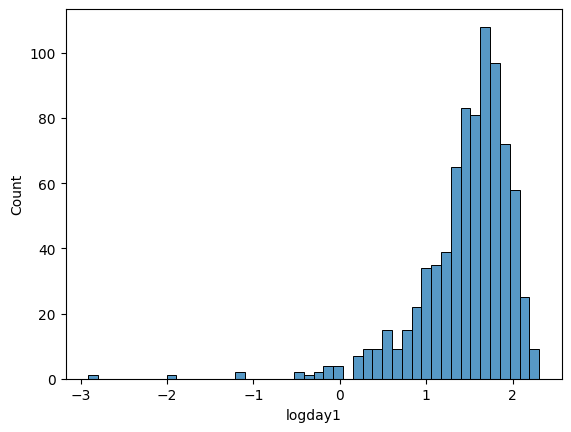

In [240]:
sns.histplot(data=festivalData, x='logday1')

<Axes: xlabel='logday2', ylabel='Count'>

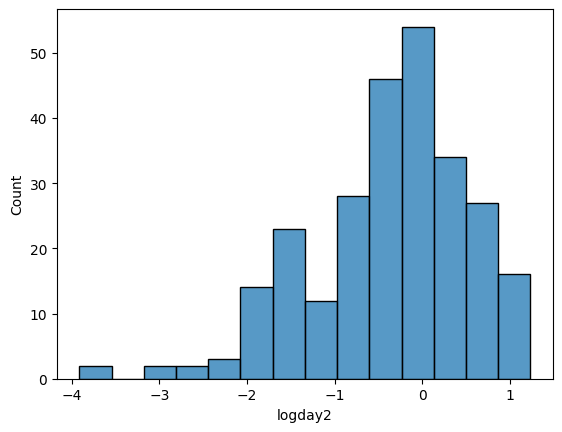

In [216]:
sns.histplot(data=festivalData, x="logday2")

<Axes: xlabel='logday3', ylabel='Count'>

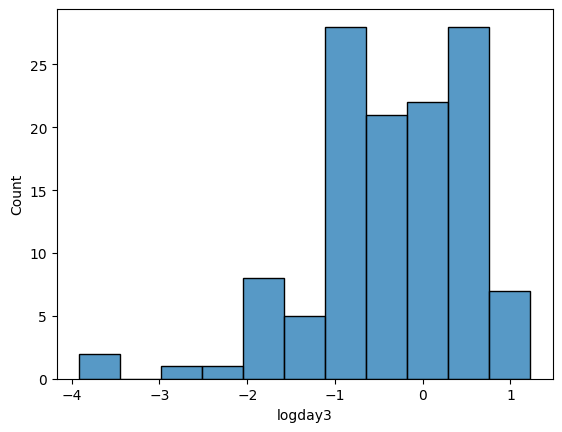

In [217]:
sns.histplot(data=festivalData, x="logday3")

### The Square root Transformation

In [223]:
festivalData['sqrtday1'] = festivalData['day1'].apply(math.sqrt)
festivalData["sqrtday2"] = festivalData["day2"].apply(lambda x: math.sqrt(x) if np.isnan(x) and x != 0 else x)
festivalData["sqrtday3"] = festivalData["day3"].apply(lambda x: math.sqrt(x) if np.isnan(x) else x)

<Axes: xlabel='sqrtday1', ylabel='Count'>

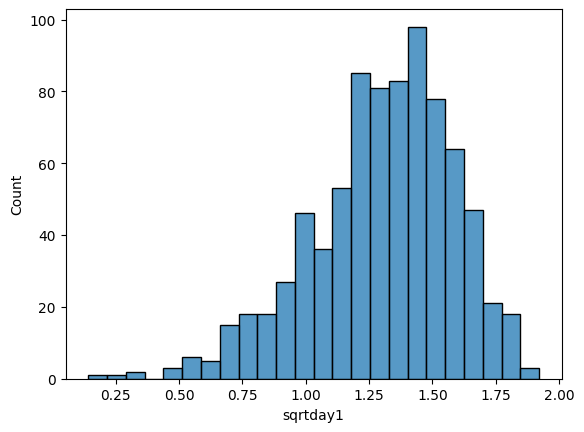

In [224]:
sns.histplot(festivalData['sqrtday1'])

<Axes: xlabel='sqrtday2', ylabel='Count'>

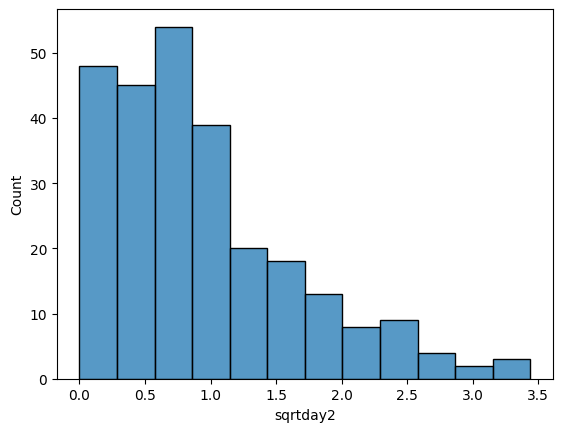

In [225]:
sns.histplot(festivalData["sqrtday2"])

<Axes: xlabel='sqrtday3', ylabel='Count'>

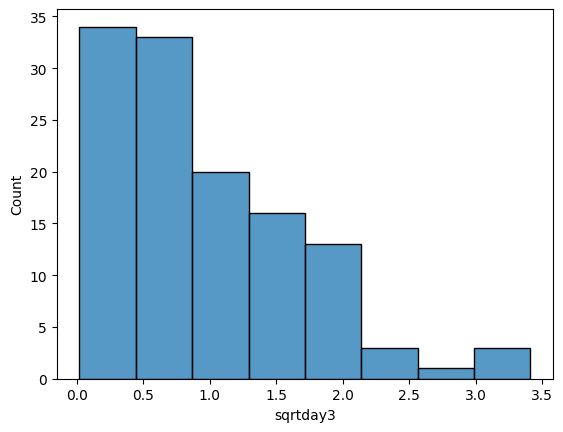

In [226]:
sns.histplot(festivalData["sqrtday3"])

### The reciprocal transformation

In [227]:
festivalData["recday1"] = 1/(festivalData["day1"]+1)
festivalData["recday2"] = 1 / (festivalData["day2"] + 1)
festivalData["recday3"] = 1 / (festivalData["day3"] + 1)

<Axes: xlabel='recday1', ylabel='Count'>

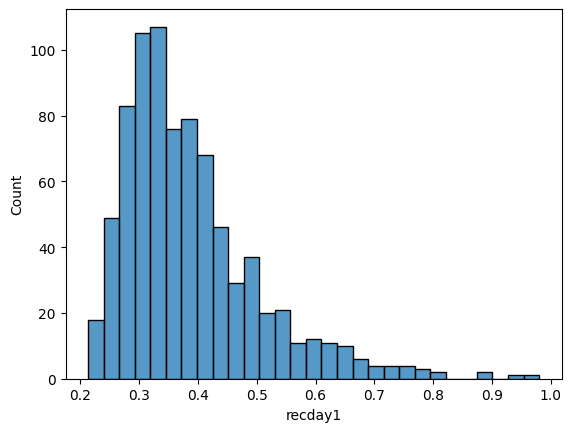

In [228]:
sns.histplot(festivalData["recday1"])

<Axes: xlabel='recday2', ylabel='Count'>

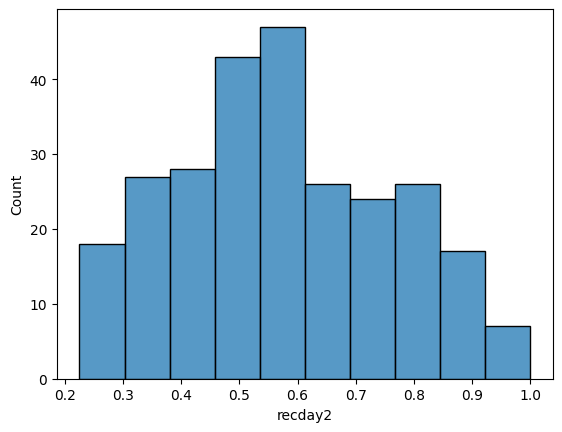

In [229]:
sns.histplot(festivalData["recday2"])

<Axes: xlabel='recday3', ylabel='Count'>

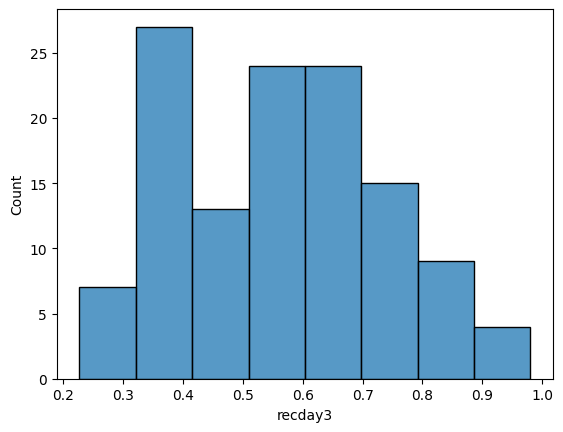

In [230]:
sns.histplot(festivalData["recday3"])

In [238]:
math.log(0.97)

-0.030459207484708574